In [1]:
import os
import pandas as pd
import seaborn as sns
import datetime as dt

#### Read the yearly files into a dataframe

In [15]:
# read all of the files into a data frame
path_template = 'https://raw.githubusercontent.com/kelly-gilbert/atlanta-pollen-count/master/data/pollen_count_{y}.csv'
df = pd.concat(pd.read_csv(path_template.format(y=year)) for year in range(1997,2020))

In [25]:

df['year'] = [int(d[0:4]) for d in df['date']]

In [30]:
sns.set_palette('cubehelix')

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


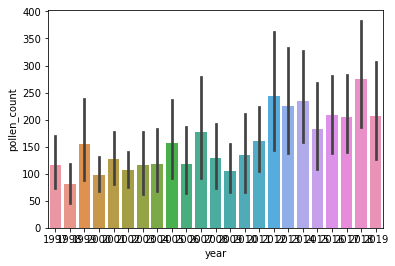

In [31]:
ax = sns.barplot(x='year', y='pollen_count', data=df)

In [27]:
df.head()

,date,pollen_count,severity_level,year
0,1997-01-02,1,low,1997
1,1997-01-03,1,low,1997
2,1997-01-06,9,low,1997
3,1997-01-07,1,low,1997
4,1997-01-08,2,low,1997


### Add columns for year and day of year

In [36]:
# add a column for year
all_df['year'] = all_df['date'].map(lambda x: int(x[0:4]))
all_df.head()

,date,pollen_count,severity_level,year
0,1997-01-02,1,low,1997
1,1997-01-03,1,low,1997
2,1997-01-06,9,low,1997
3,1997-01-07,1,low,1997
4,1997-01-08,2,low,1997


In [37]:
# add a column for day of year
def day_of_year(d):
    d2 = dt.date.fromisoformat(d)
    return (d2 - dt.date(d2.year, 1, 1)).days + 1


all_df['day_of_year'] = all_df['date'].apply(day_of_year)
all_df.head()

,date,pollen_count,severity_level,year,day_of_year
0,1997-01-02,1,low,1997,2
1,1997-01-03,1,low,1997,3
2,1997-01-06,9,low,1997,6
3,1997-01-07,1,low,1997,7
4,1997-01-08,2,low,1997,8


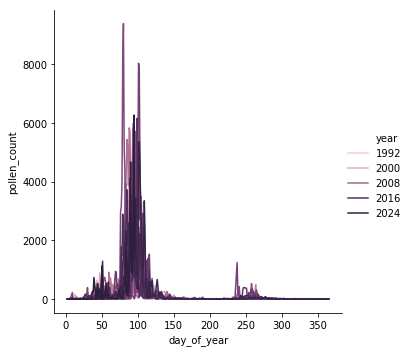

In [50]:
# plot all values
sns.relplot(x="day_of_year", y="pollen_count", kind="line", 
            hue="year", data=all_df)

### Find the dividing date between spring and fall seasons

In [23]:
print(day_of_year('2019-08-01'))

213


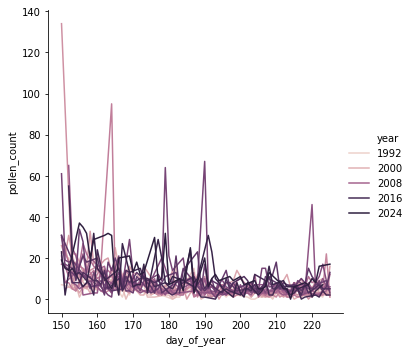

In [30]:
# subset of day 150-225
sub_df = all_df.query("day_of_year >= 150 & day_of_year <= 225")

# plot all values
sns.relplot(x="day_of_year", y="pollen_count", kind="line", 
            hue="year", data=sub_df)

In [29]:
# why is there a year 2024 in the above chart?!
sub_df.query("year == 2024")

,date,pollen_count,severity_level,year,day_of_year


In [55]:
# split the seasons at day 200
all_df['season'] = all_df['day_of_year'].map(lambda x: 'spring' if x <= 200 else 'fall')
all_df.head()

,date,pollen_count,severity_level,year,day_of_year,season
0,1997-01-02,1,low,1997,2,spring
1,1997-01-03,1,low,1997,3,spring
2,1997-01-06,9,low,1997,6,spring
3,1997-01-07,1,low,1997,7,spring
4,1997-01-08,2,low,1997,8,spring


,date,pollen_count,severity_level,year,day_of_year,season
0,1997-01-02,1,low,1997,2,spring
1,1997-01-03,1,low,1997,3,spring
2,1997-01-06,9,low,1997,6,spring
3,1997-01-07,1,low,1997,7,spring
4,1997-01-08,2,low,1997,8,spring
